In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
tf.__version__

'1.2.1'

In [4]:
learning_rate = 0.01
num_epochs = 1000
step_display = 50

In [5]:
x = [2.7, 4.8, 9.3, 13.4, 24.8, 31.3, 48.5, 53.0, 68.1, 74.2, 88.6, 94.5]
y = [7.0, 28.8, 22.8, 67.1, 48.8, 100.2, 140.0, 190.2, 215.2, 285.6, 260.3, 251.1]

In [6]:
assert len(x) == len(y)

In [7]:
len(x)

12

In [9]:
weight = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name = 'weight')
bias = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name = 'bias')

In [10]:
x_true = tf.placeholder(dtype = tf.float32, name = 'x_true')
y_true = tf.placeholder(dtype = tf.float32, name = 'y_true')

In [12]:
y_pred = tf.add(tf.multiply(weight, x_true), bias)
cost = tf.reduce_mean(tf.square(y_pred - y_true))

In [15]:
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
init = tf.global_variables_initializer()
sess = tf.Session()

In [16]:
sess.run(init)

In [25]:
for epoch in range(num_epochs) :
    _, c = sess.run([optimizer, cost], feed_dict = {x_true : x, y_true : y})
    if (epoch + 1) % step_display == 0 :
        print('Epoch: {0}, cost: {1}, weight: {2}, bias: {3}'.format(epoch + 1, c, sess.run(weight), sess.run(bias)))
print('done')

Epoch: 50, cost: 10009.8037109375, weight: [ 1.2798605], bias: [ 0.20350811]
Epoch: 100, cost: 6043.37841796875, weight: [ 1.70905638], bias: [ 0.63420111]
Epoch: 150, cost: 3537.317626953125, weight: [ 2.07100415], bias: [ 0.99943089]
Epoch: 200, cost: 2070.820556640625, weight: [ 2.36423016], bias: [ 1.29815423]
Epoch: 250, cost: 1282.82080078125, weight: [ 2.59119964], bias: [ 1.53315997]
Epoch: 300, cost: 896.6818237304688, weight: [ 2.75832367], bias: [ 1.71100605]
Epoch: 350, cost: 724.861083984375, weight: [ 2.8750689], bias: [ 1.84110904]
Epoch: 400, cost: 655.5634155273438, weight: [ 2.95234013], bias: [ 1.93417323]
Epoch: 450, cost: 630.2241821289062, weight: [ 3.00077629], bias: [ 2.00056362]
Epoch: 500, cost: 621.7988891601562, weight: [ 3.02951455], bias: [ 2.04913855]
Epoch: 550, cost: 619.2230834960938, weight: [ 3.04562187], bias: [ 2.08672714]
Epoch: 600, cost: 618.4668579101562, weight: [ 3.05410528], bias: [ 2.11815763]
Epoch: 650, cost: 618.2196044921875, weight: [ 

In [26]:
training_cost = sess.run(cost, feed_dict = {x_true : x, y_true : y})
print('result cost: {}'.format(c))
print('result weight: {}'.format(sess.run(weight)))
print('result bias: {}'.format(sess.run(bias)))

result cost: 617.5194702148438
result weight: [ 3.0591073]
result bias: [ 2.35015392]


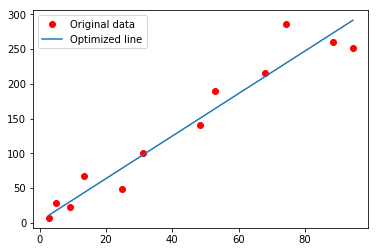

In [27]:
plt.plot(x, y, 'ro', label = 'Original data')
plt.plot(x, sess.run(weight) * x + sess.run(bias), label = 'Optimized line')
plt.legend()
plt.show()

In [28]:
sess.close()